In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and direc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'

Mounted at /content/drive


In [ ]:
cctv_data = pd.read_csv('/content/drive/MyDrive/DATA/불법주정차프로젝트/cctv_mapogu.csv')
cctv_data.head(3)

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분,동
0,공덕동 463,37.550121,126.954821,마포구,마포경찰서 주변,불법주정차구역,공덕동
1,아현동 282-1,37.555140,126.955825,마포구,아현초등학교 주변,불법주정차구역,아현동
2,아현동 326-16,37.555392,126.955175,마포구,행화정교회 주변,불법주정차구역,아현동


<Figure size 1200x1200 with 0 Axes>

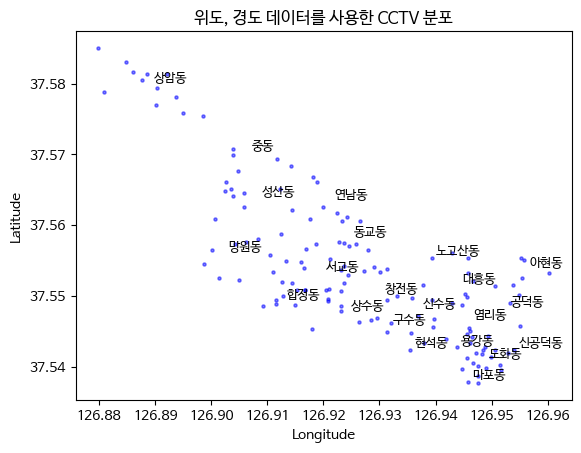

In [ ]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(cctv_data, geometry=gpd.points_from_xy(cctv_data['경도'], cctv_data['위도']))
gdf.crs = "EPSG:4326"  # WGS 84 좌표계 설정

plt.figure(figsize=(12, 12))
ax = gdf.plot(marker='o', color='blue', markersize=5, alpha=0.5)
representative_points = gdf.groupby('동').agg({'위도': 'mean', '경도': 'mean'}).reset_index()

for idx, row in representative_points.iterrows():
    plt.annotate(text=row['동'], xy=(row['경도'], row['위도']), xytext=(3,3), textcoords="offset points", fontsize=9)

plt.title('위도, 경도 데이터를 사용한 CCTV 분포')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<ipython-input-7-9c53af20161f>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_gdf['geometry'] = centroid_gdf['geometry'].centroid


<Figure size 1200x1200 with 0 Axes>

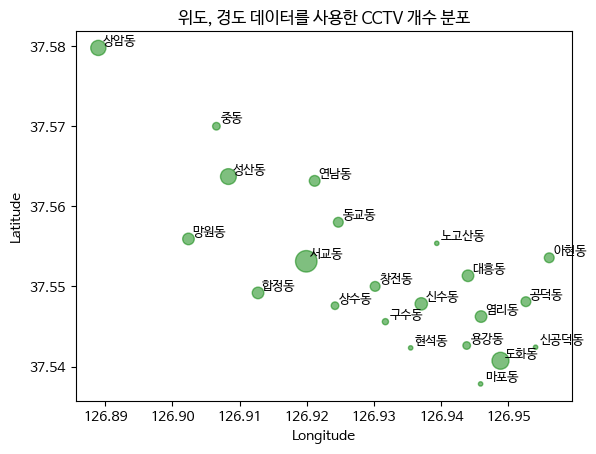

In [ ]:
# 각 '동'별 CCTV 개수 계산
cctv_counts = gdf.groupby('동').size().reset_index(name='count')

# 각 '동'의 지리적 중심점 계산
centroid_gdf = gdf.dissolve(by='동').reset_index()
centroid_gdf['geometry'] = centroid_gdf['geometry'].centroid

# 위도와 경도 컬럼 추가
centroid_gdf['경도'] = centroid_gdf['geometry'].x
centroid_gdf['위도'] = centroid_gdf['geometry'].y

# 중심점 GeoDataFrame과 CCTV 개수 데이터 병합
merged_gdf = pd.merge(centroid_gdf, cctv_counts, on='동')

# 시각화
plt.figure(figsize=(12, 12))
ax = merged_gdf.plot(x='경도', y='위도', kind='scatter', s=merged_gdf['count']*10, alpha=0.5, color='green')

# 각 '동'의 중심점에 주석 추가
for idx, row in merged_gdf.iterrows():
    plt.annotate(text=row['동'], xy=(row['경도'], row['위도']), xytext=(3,3), textcoords="offset points", fontsize=9)

plt.title('위도, 경도 데이터를 사용한 CCTV 개수 분포')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


<Figure size 1200x1200 with 0 Axes>

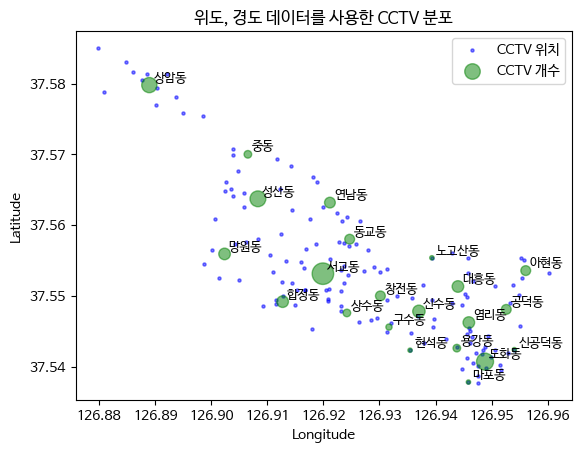

In [ ]:
# 시각화 준비
plt.figure(figsize=(12, 12))

# 첫 번째 데이터셋(gdf)를 사용하여 CCTV 위치 플롯
ax = gdf.plot(marker='o', color='blue', markersize=5, alpha=0.5, label='CCTV 위치')

# merged_gdf에서 각 '동'의 중심점과 CCTV 개수 산점도 플롯
merged_gdf.plot(x='경도', y='위도', kind='scatter', s=merged_gdf['count']*10, alpha=0.5, color='green', ax=ax, label='CCTV 개수')

# 각 '동'의 중심점에 주석 추가
for idx, row in merged_gdf.iterrows():
    plt.annotate(text=row['동'], xy=(row['경도'], row['위도']), xytext=(3,3), textcoords="offset points", fontsize=9)

# 그래프 제목 및 레이블 설정
plt.title('위도, 경도 데이터를 사용한 CCTV 분포')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()